In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

In [ ]:
df = pd.read_csv("data.csv")

In [ ]:
random_indices = np.random.choice(df.index, size =15, replace=False)
random_indices1 = np.random.choice(df.index, size =15, replace=False)

In [ ]:
df.loc[random_indices, "GrLivArea"] = np.nan
df.loc[random_indices, "GarageArea"] = np.nan

In [ ]:
df.drop(columns="KitchenQual", inplace=True)


In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(df.drop(columns="SalesPrice"), df["SalesPrice"], random_state=0, test_size=0.3)

In [ ]:
x_train.isna().sum()

In [6]:
pipeline = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean")),
    ('scaler', StandardScaler())
])

In [ ]:
pipeline.fit(x_train, y_train) #.fit se cheama doar pe seturi de antrenare

In [ ]:
x_Train_transformed = pipeline.transform(x_train)

In [ ]:
pd.DataFrame(x_Train_transformed, columns = x_Train_transformed.columns).isna().sum()

In [ ]:
pipeline.transform(x_val)

In [ ]:
df = pd.read_csv("data.csv")
random_indices = np.random.choice(df.index, size =15, replace=False)
random_indices1 = np.random.choice(df.index, size =15, replace=False)
df.loc[random_indices, "GrLivArea"] = np.nan
df.loc[random_indices, "GarageArea"] = np.nan

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(df.drop(columns="SalesPrice"), df["SalesPrice"], random_state=0, test_size=0.3)


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin

class MedianImputer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(sef, X, y=None):
        self.medians_ = np.nanmedian(X,axis = 0)
        return self 
    
    def transform(self, X):
        X = X.values
        X_transformed = X.copy()
        for i in range(X.shape[1]):
            X_transformed[np.isnan(X_transformed[:, i]), i] = self.medians_[i]
        
        return X_transformed

numerical_transformer= Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean")),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[('encoder',OrdinalEncoder(categories=[['Fa', 'TA', 'Gd', 'Ex']]))])

preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_transformer, ["OverallQual", "GrLivArea", "BedroomAbvGre","GarageArea", "YearBuilt"]),
    ('cat', categorical_transformer, ["KitchenQual"])
])

In [ ]:
preprocessor.fit_transform(x_train)

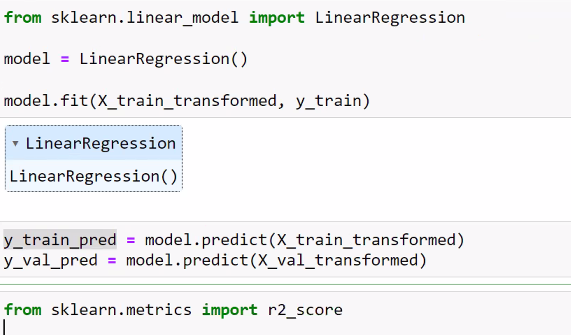

In [ ]:
from sklearn.metrics import r2_score

r2_score(y_train, y_train_pred), r2_score(y_val, y_val_pred)

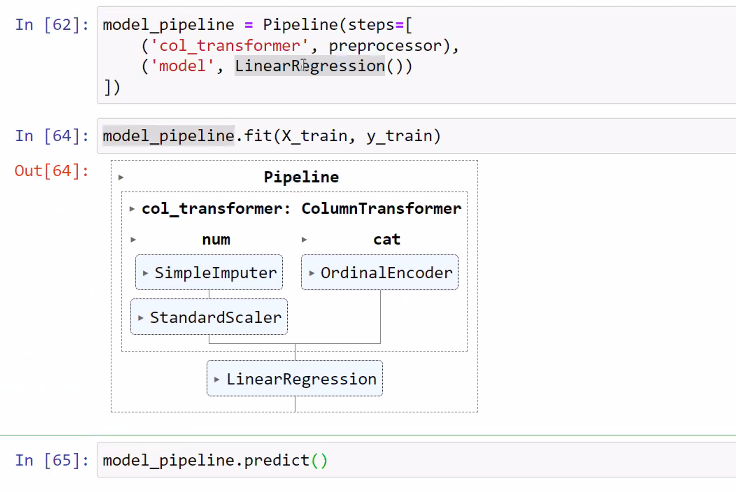

In [ ]:
y_train_pred = model_pipeline.predict(x_train)
y_val_pred = model_pipeline.predict(x_val)

In [ ]:
r2_score(y_train, y_train_pred), r2_score(y_val, y_val_pred)

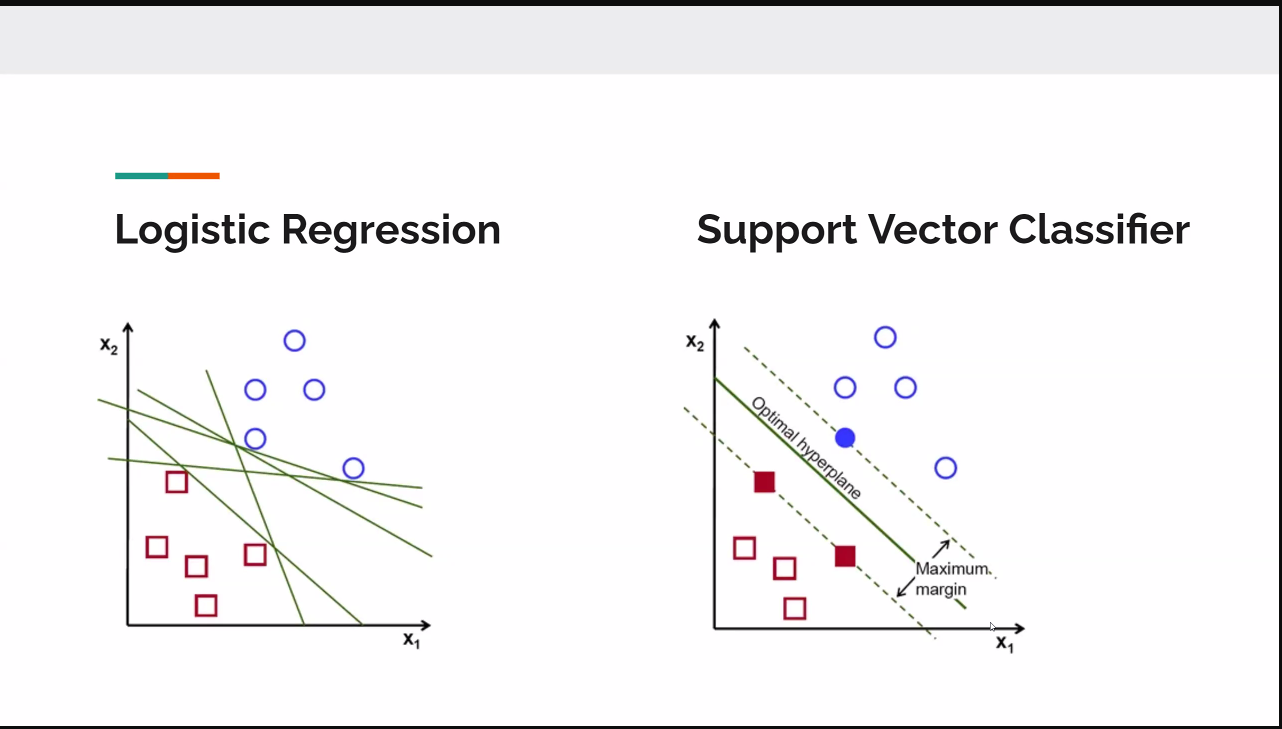

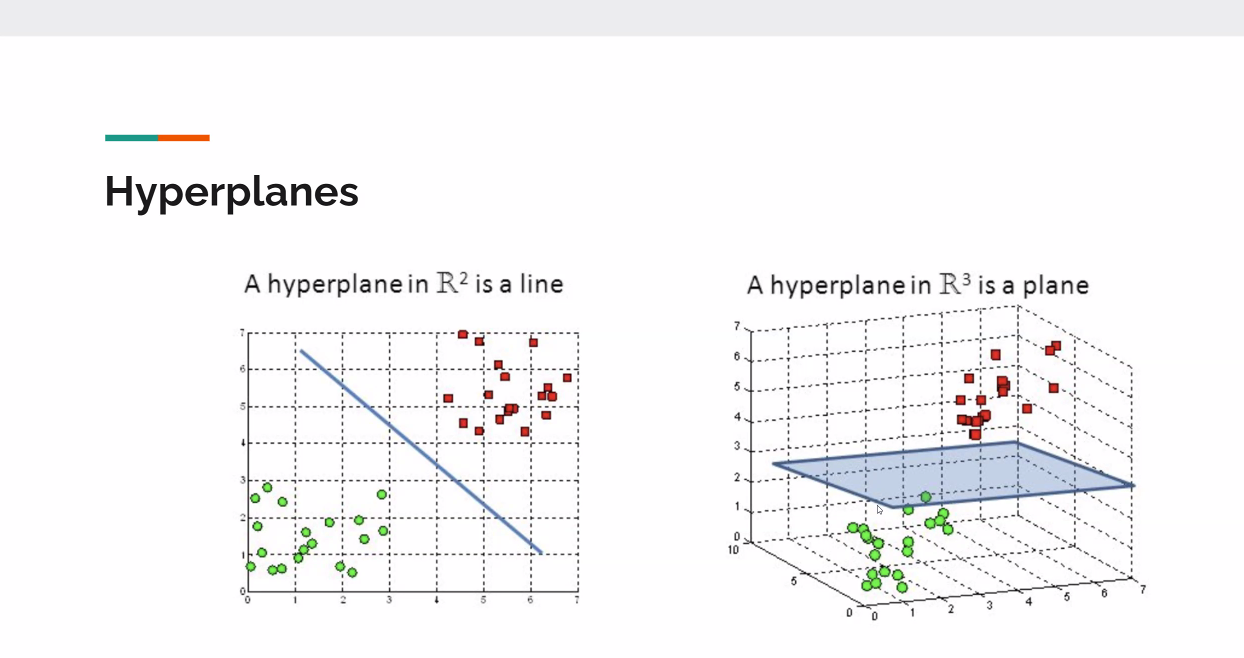

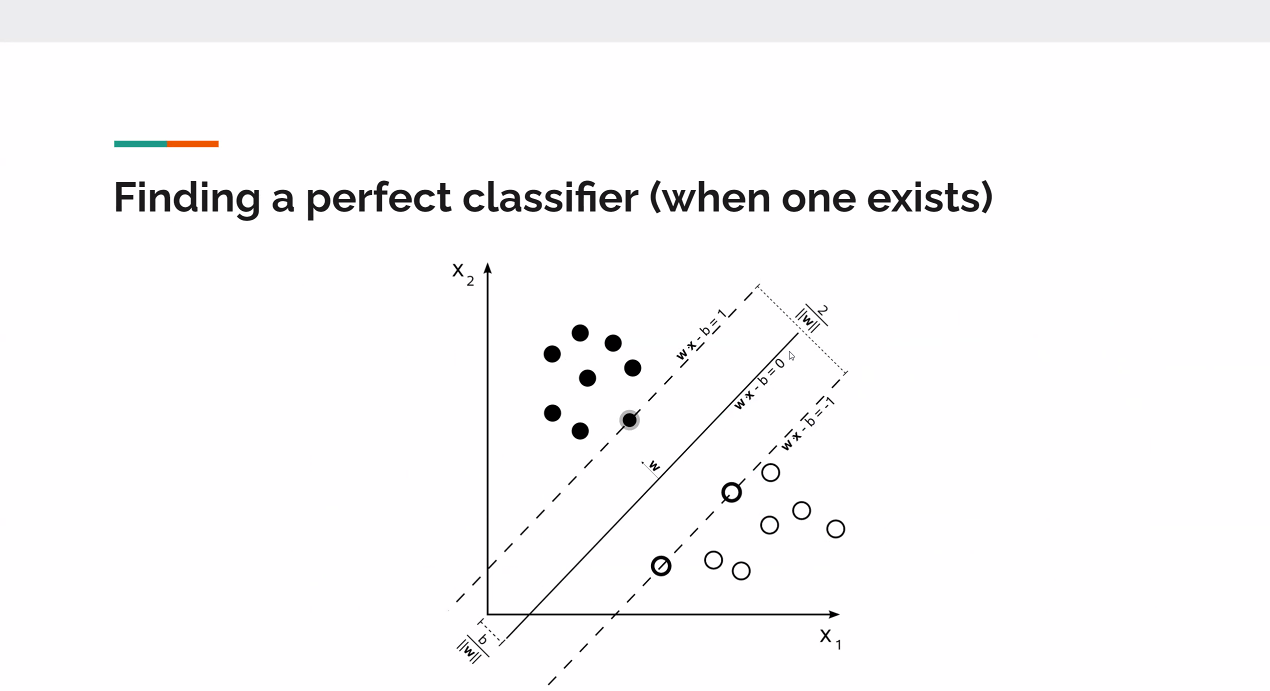

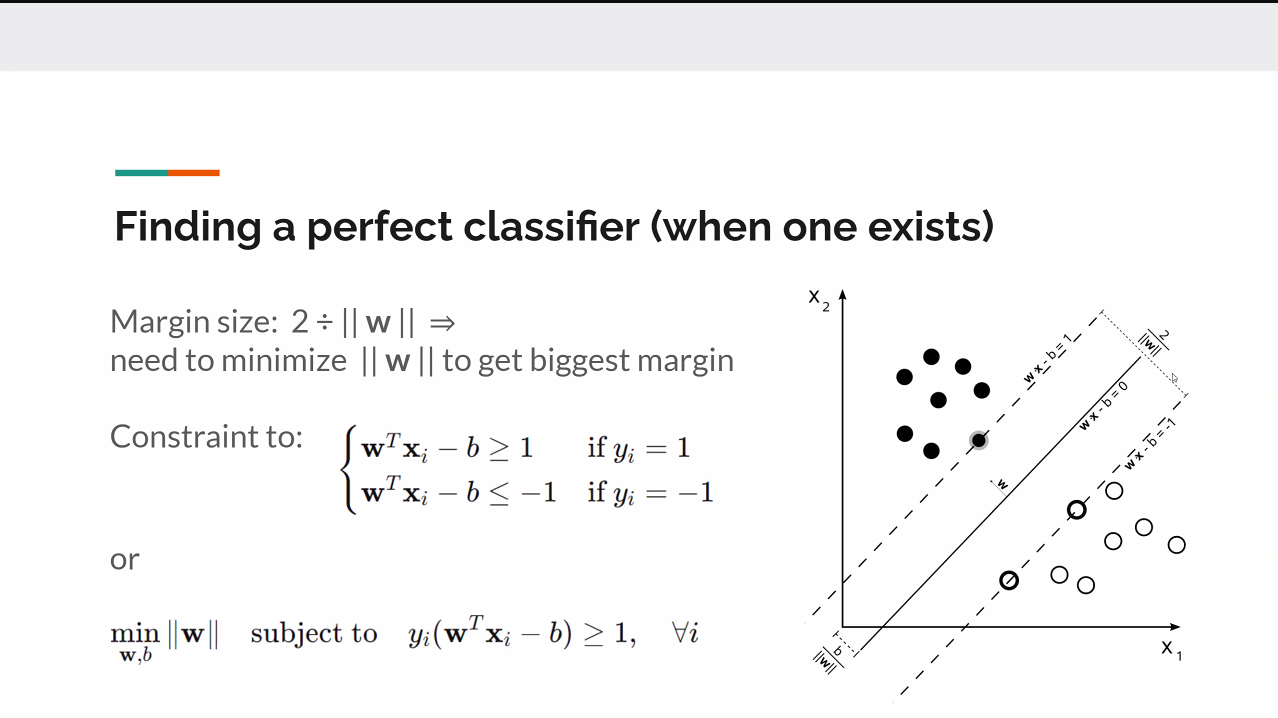

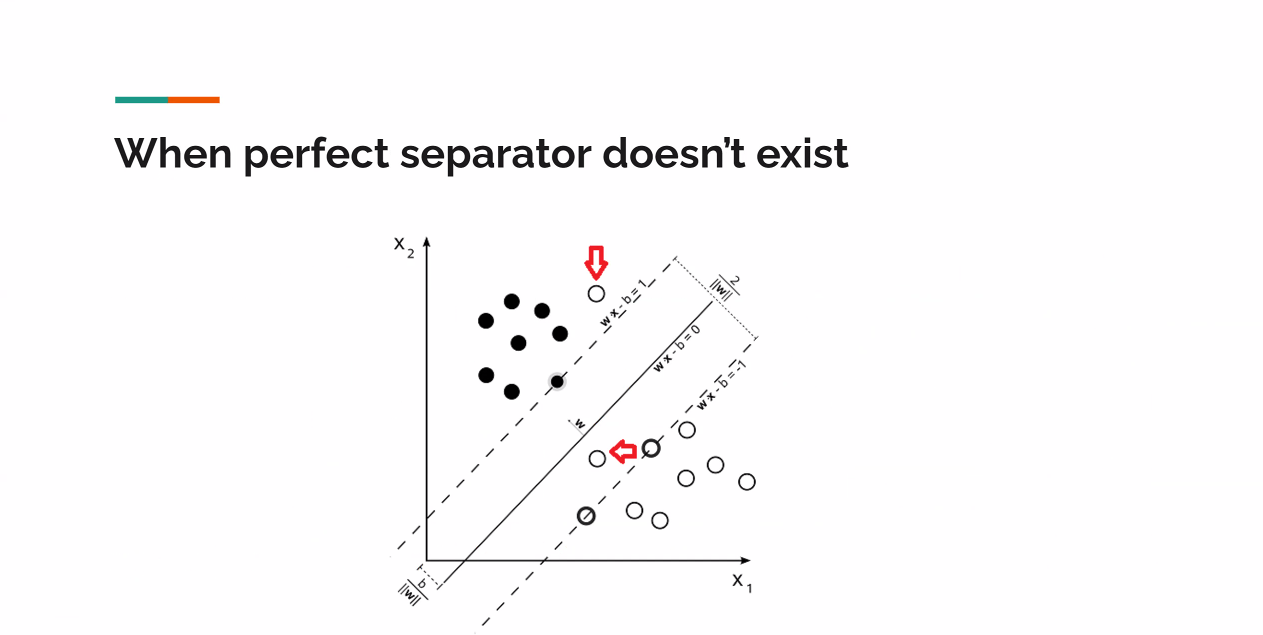

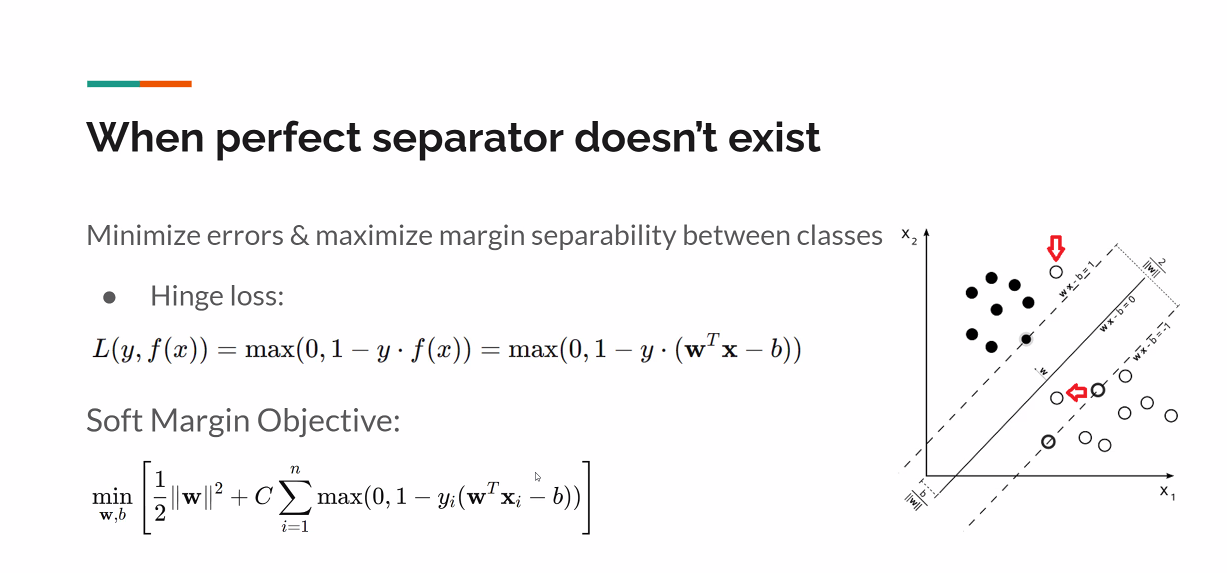

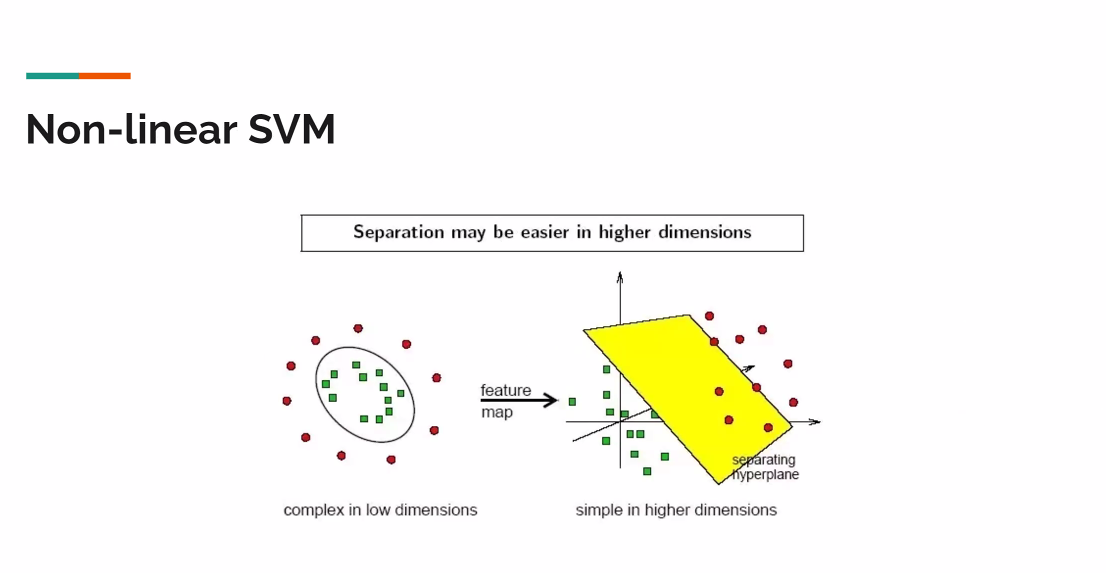

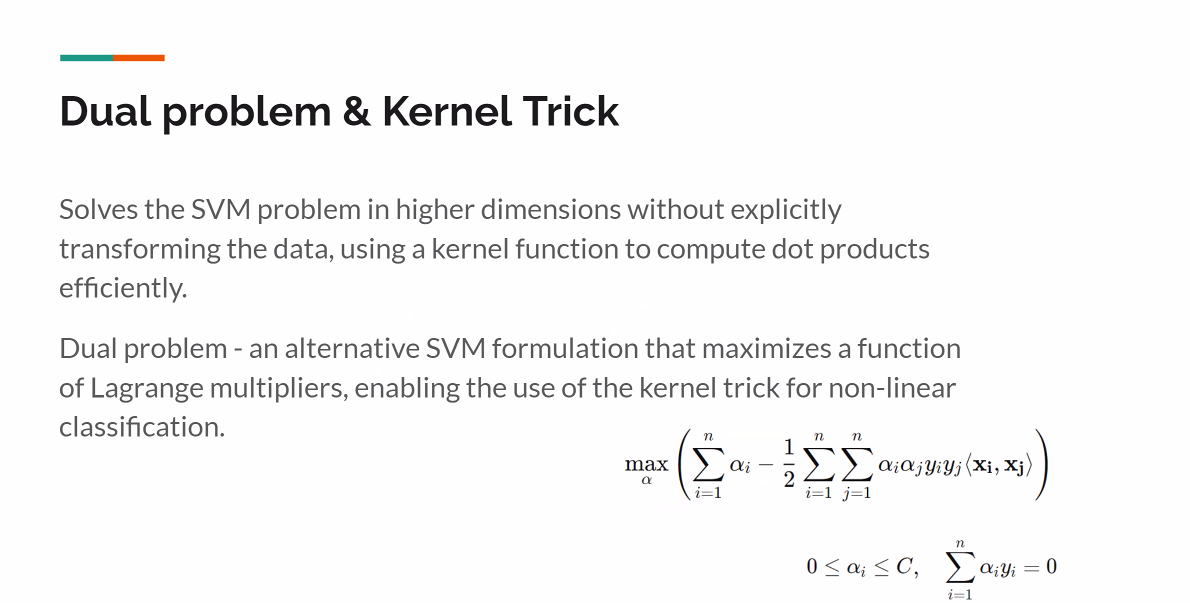

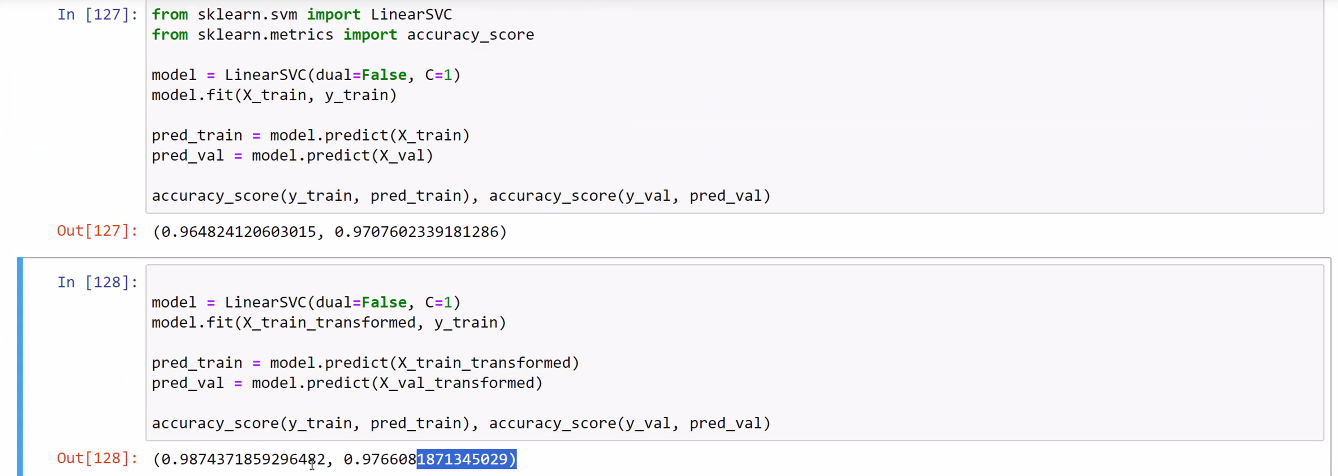

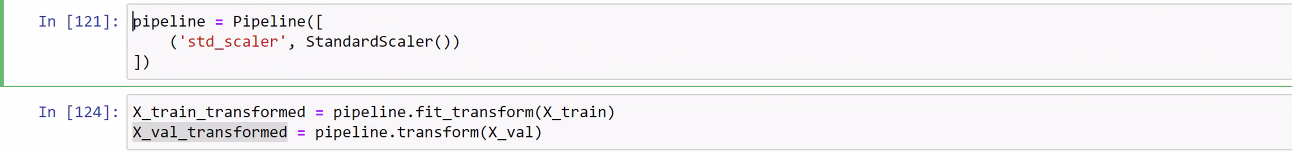

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_val, y_pred_val)


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.xlabel('Actual')
plt.show()

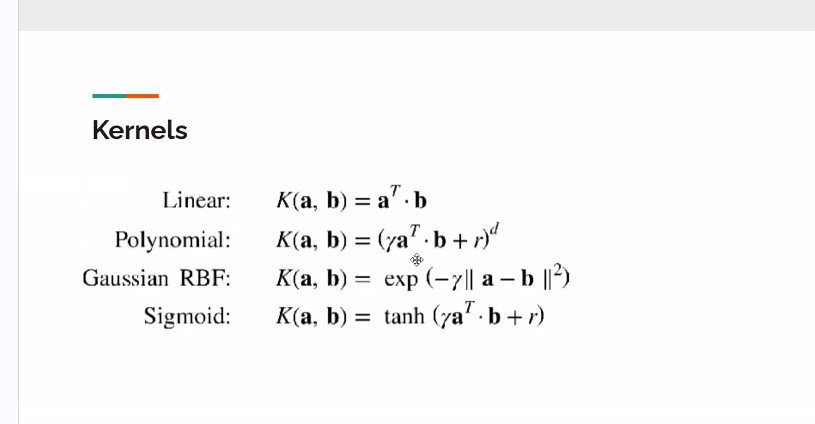

In [ ]:
from sklearn.svm import SVC
model = SVC(kerne='poly', degree=2, gamma="auto", coef0=1, C=1)
model.fit(x_train, y_train)
pred_train = model.predict(x_train)
pred_val = model.predict(x_val)

accuracy_score(y_train, pred_train), accuracy_score(y_val, pred_Val)

In [ ]:
model = SVC(kerne='poly', degree=2, gamma="auto", coef0=1, C=1)
model.fit(x_Train_transformed, y_trai)
pred_train = model.predict(x_Train_transformed)
pred_val = model.predict(x_Train_transformed)

accuracy_score(y_train, pred_train), accuracy_score(y_val, pred_Val)

In [ ]:

model = SVC(kerne='rbf', gamma="auto", C=1)
model.fit(x_Train_transformed, y_trai)
pred_train = model.predict(x_Train_transformed)
pred_val = model.predict(x_Train_transformed)

accuracy_score(y_train, pred_train), accuracy_score(y_val, pred_Val)